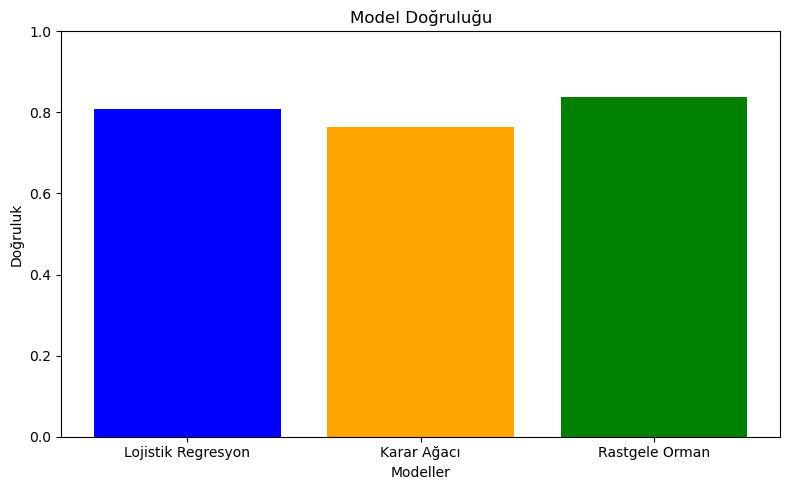

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

file_path = 'banka.csv'
data = pd.read_csv(file_path)

data.replace("unknown", pd.NA, inplace=True)

binary_columns = ['default', 'housing', 'loan', 'deposit']
for col in binary_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

X = data.drop('deposit', axis=1)  
y = data['deposit']               

scaler = StandardScaler()
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_preds)
log_reg_report = classification_report(y_test, log_reg_preds, output_dict=True)

dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
dec_tree_preds = dec_tree.predict(X_test)
dec_tree_acc = accuracy_score(y_test, dec_tree_preds)
dec_tree_report = classification_report(y_test, dec_tree_preds, output_dict=True)

rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)
rand_forest.fit(X_train, y_train)
rand_forest_preds = rand_forest.predict(X_test)
rand_forest_acc = accuracy_score(y_test, rand_forest_preds)
rand_forest_report = classification_report(y_test, rand_forest_preds, output_dict=True)


models = ['Lojistik Regresyon', 'Karar Ağacı', 'Rastgele Orman']
accuracies = [log_reg_acc, dec_tree_acc, rand_forest_acc]
f1_scores = [log_reg_report['1']['f1-score'], dec_tree_report['1']['f1-score'], rand_forest_report['1']['f1-score']]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.ylim([0, 1])
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Modeller')


plt.tight_layout()
plt.show()
